# B站up主盈利以及社交网络分析

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from imp import reload
%matplotlib inline
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
mydf = pd.read_csv("data/data.csv")
mydf.head()

,aid,view,danmaku,favorite,coin,share
0,38551379,4,0,2,1,2
1,38642149,34,0,0,2,0
2,38640540,16,0,3,6,1
3,38637594,18,4,2,2,1
4,38637432,17,0,2,5,0


In [3]:
mydf.describe()

,aid,view,danmaku,favorite,coin,share
count,2.972100e+04,2.972100e+04,29721.000000,29721.000000,29721.000000,29721.000000
mean,3.602596e+07,2.623039e+04,500.034958,290.679284,319.071229,81.538609
std,5.865807e+06,2.287114e+05,7366.269632,4838.574437,3413.510930,1157.275981
min,3.563000e+03,-1.000000e+00,0.000000,0.000000,1.000000,0.000000
25%,3.666325e+07,1.120000e+02,0.000000,2.000000,2.000000,0.000000
50%,3.831350e+07,6.590000e+02,2.000000,10.000000,8.000000,2.000000
75%,3.857691e+07,3.886000e+03,20.000000,54.000000,35.000000,9.000000
max,3.864689e+07,1.597445e+07,872456.000000,660184.000000,352062.000000,148587.000000


## coin数与其他数据的关系 
### 线性回归
#### 建模

In [4]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
msk = np.random.rand(len(mydf)) < 0.8
train = mydf[msk]
test = mydf[~msk]
def linear_coin_train(name, loc, train):
    regr = linear_model.LinearRegression()
    train = train.sort_values(by=name)
    train_x=np.asanyarray(train[[name]])
    train_y=np.asanyarray(train[["coin"]])
    regr.fit(train_x, train_y)
    print(name)
    print ('Coefficients: ', regr.coef_)
    print ('Intercept: ', regr.intercept_)
    plt.subplot(2,2,loc)
    train_y_=regr.predict(train_x)
    plt.plot(train_x, train_y_ , color='black',linewidth=3)
    plt.scatter(train[[name]], train[["coin"]],  color = 'b')
    plt.title("coin & " + name)
    plt.ylabel("coin")
    plt.xlabel(name)
    print('')

view
Coefficients:  [[0.01177649]]
Intercept:  [15.58205216]

favorite
Coefficients:  [[0.54720775]]
Intercept:  [166.35257735]

danmaku
Coefficients:  [[0.37766963]]
Intercept:  [135.76995513]

share
Coefficients:  [[2.58114855]]
Intercept:  [116.83005019]



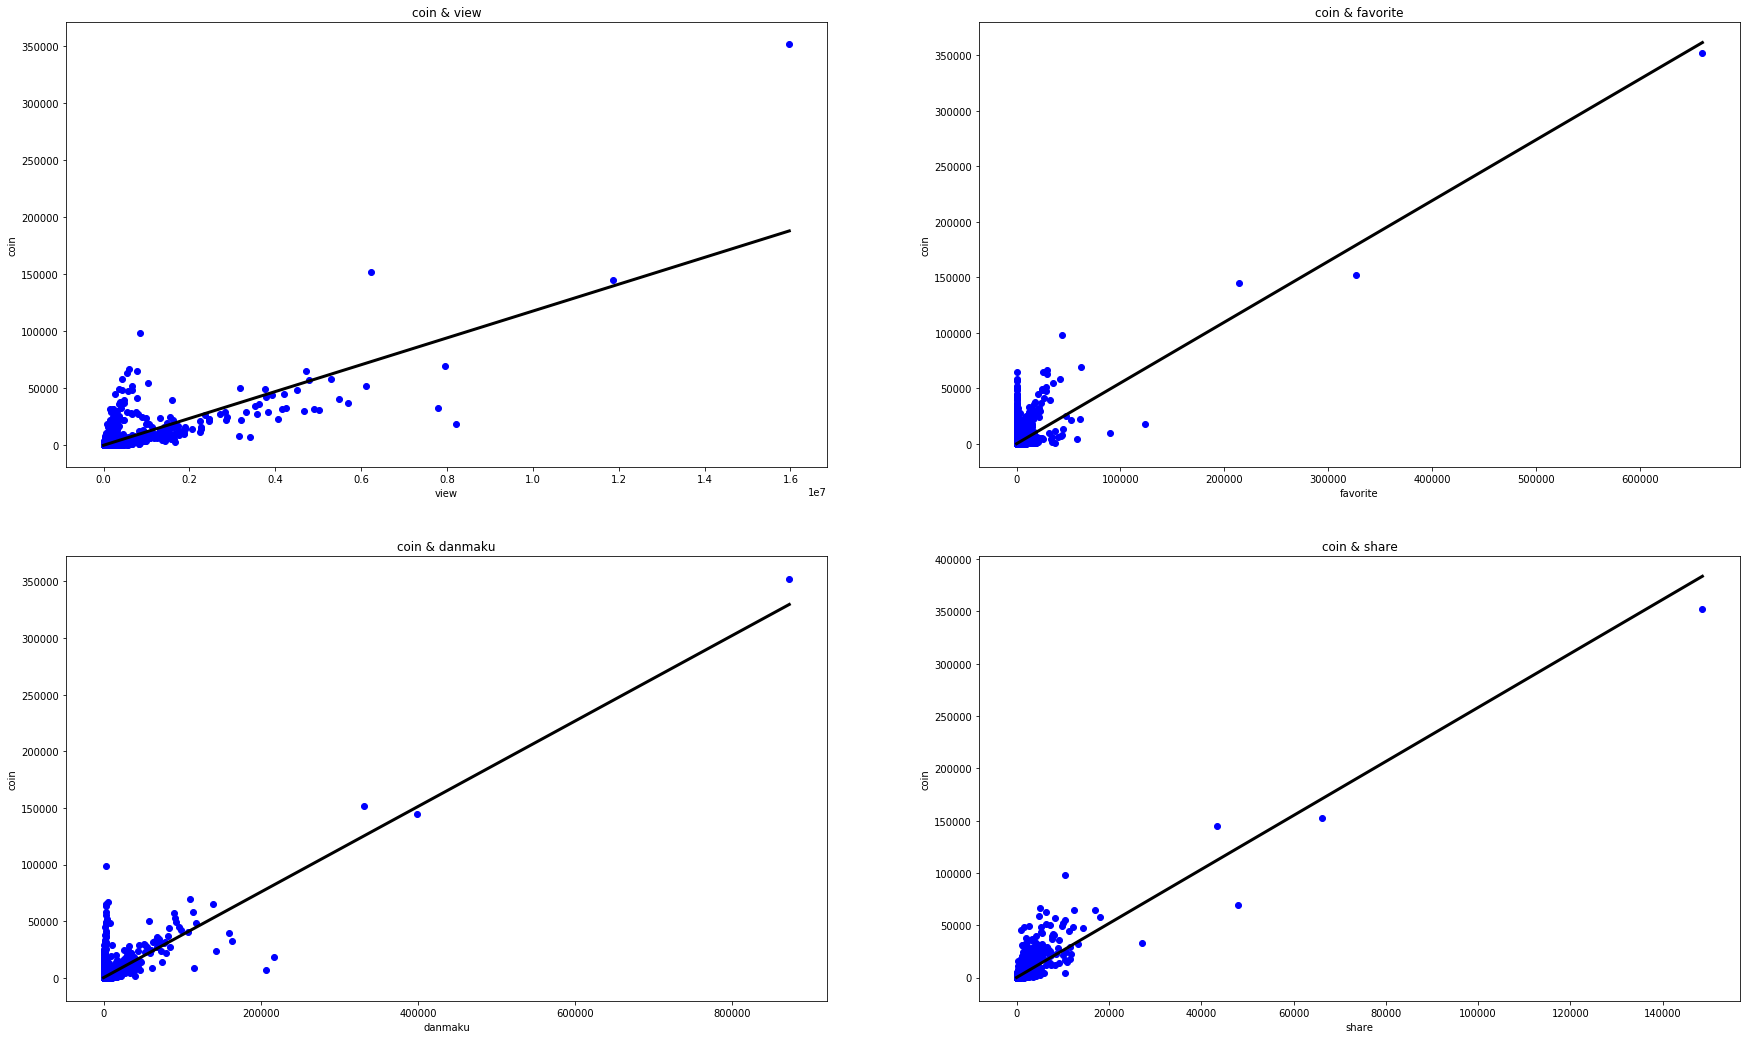

In [5]:
plt.figure(figsize=(30,18))
linear_coin_train('view', 1, train)
linear_coin_train('favorite', 2, train)
linear_coin_train('danmaku', 3, train)
linear_coin_train('share', 4, train)

### 评估

In [6]:
def linear_coin_test(name, loc, test):
    regr = linear_model.LinearRegression()
    test = test.sort_values(by=name)
    test_x=np.asanyarray(test[[name]])
    test_y=np.asanyarray(test[["coin"]])
    regr.fit(test_x, test_y)
    print(name)
    plt.subplot(2,2,loc)
    test_y_=regr.predict(test_x)
    print("Residual mean of squares: %.2f" % np.mean((test_y_ - test_y) ** 2))
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % regr.score(test_x, test_y))

    plt.plot(test_x, test_y_ , color='black',linewidth=3)
    plt.scatter(test[[name]], test[["coin"]],  color = 'b')
    plt.title("coin & " + name)
    plt.ylabel("coin")
    plt.xlabel(name)
    print('')

view
Residual mean of squares: 2669641.94
Variance score: 0.45

favorite
Residual mean of squares: 3687817.97
Variance score: 0.24

danmaku
Residual mean of squares: 3630316.82
Variance score: 0.25

share
Residual mean of squares: 2601993.13
Variance score: 0.46



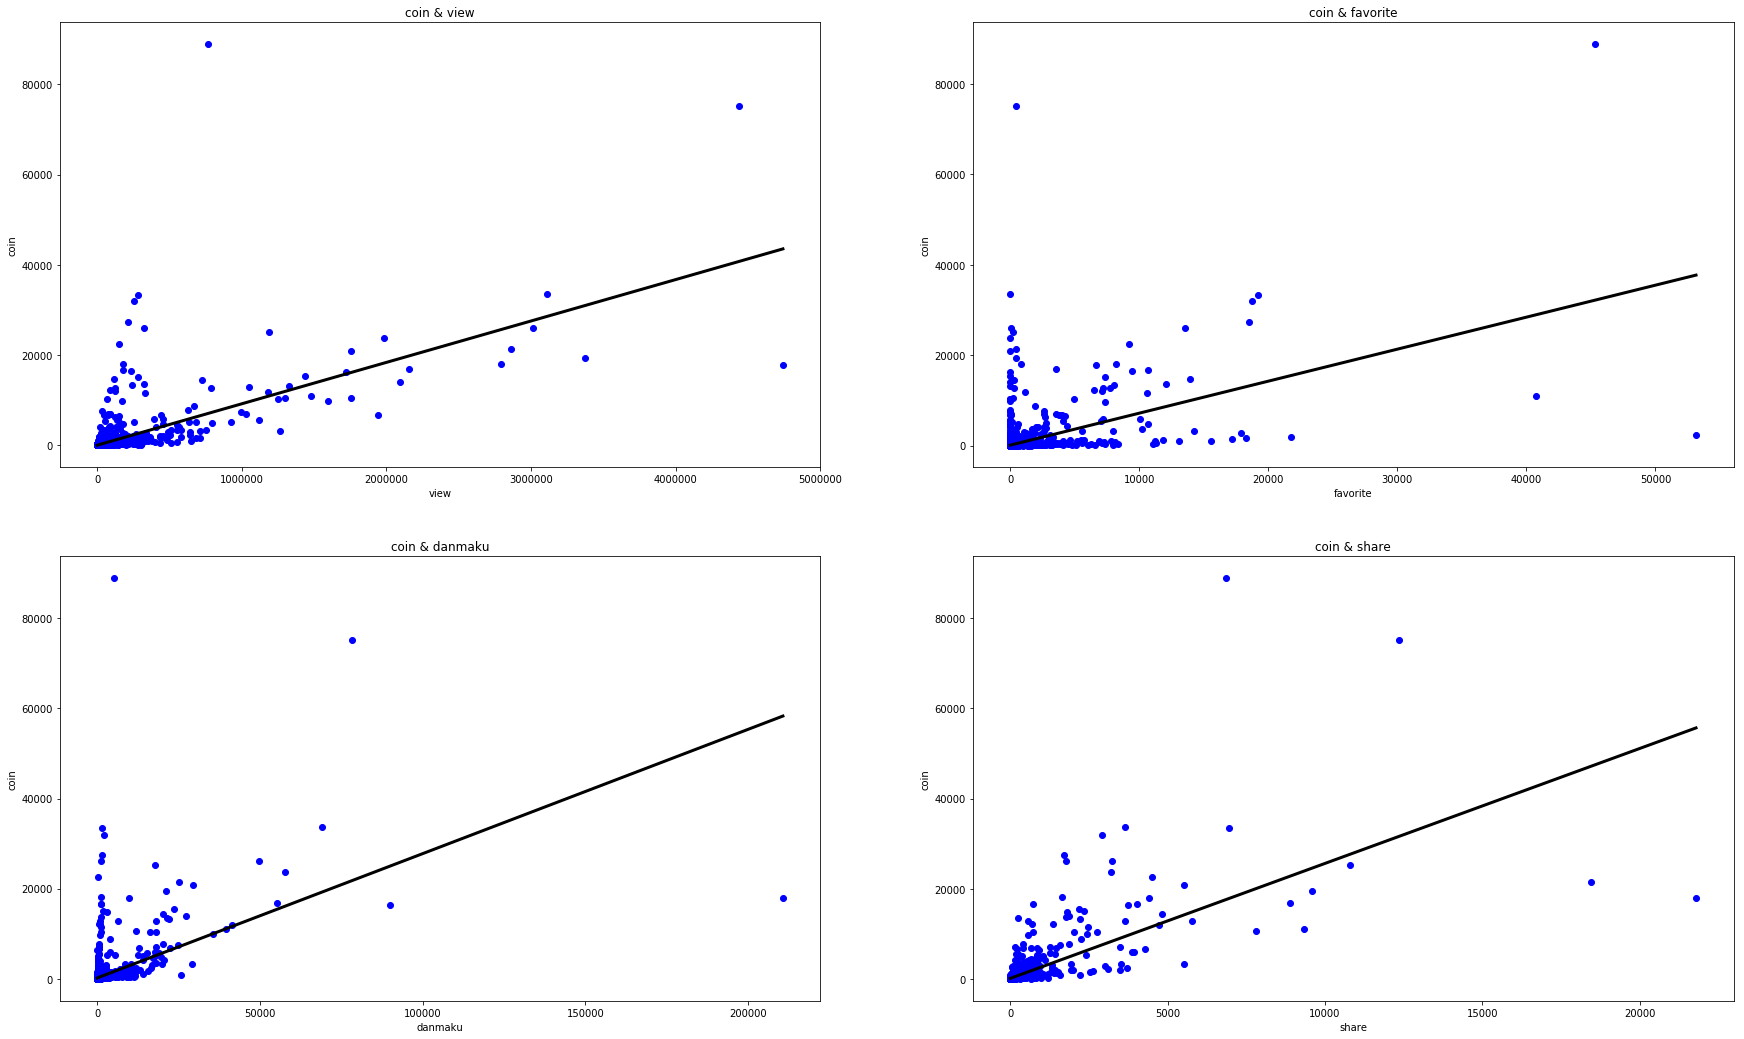

In [7]:
plt.figure(figsize=(30,18))
linear_coin_test('view', 1, test)
linear_coin_test('favorite', 2, test)
linear_coin_test('danmaku', 3, test)
linear_coin_test('share', 4, test)

## 非线性回归

In [8]:
def poli_coin(name, train, test, pos):
    test_x=np.asanyarray(test[[name]])
    test_y=np.asanyarray(test[['coin']])
    poly = PolynomialFeatures(degree=2)
    train_x=np.asanyarray(train[[name]])
    train_y=np.asanyarray(train[["coin"]])
    train_x_poly = poly.fit_transform(train_x)
    clf = linear_model.LinearRegression()
    train_y_ = clf.fit(train_x_poly, train_y)
    test_x_poly = poly.fit_transform(test_x)
    test_y_ = clf.predict(test_x_poly)
    
    plt.subplot(2, 2, pos)
    
    plt.scatter(test_x, test_y,  color='g')
    plt.scatter(test_x, test_y_, linewidth=2)
    plt.title("coin & " + name)
    plt.ylabel("coin")
    plt.xlabel(name)

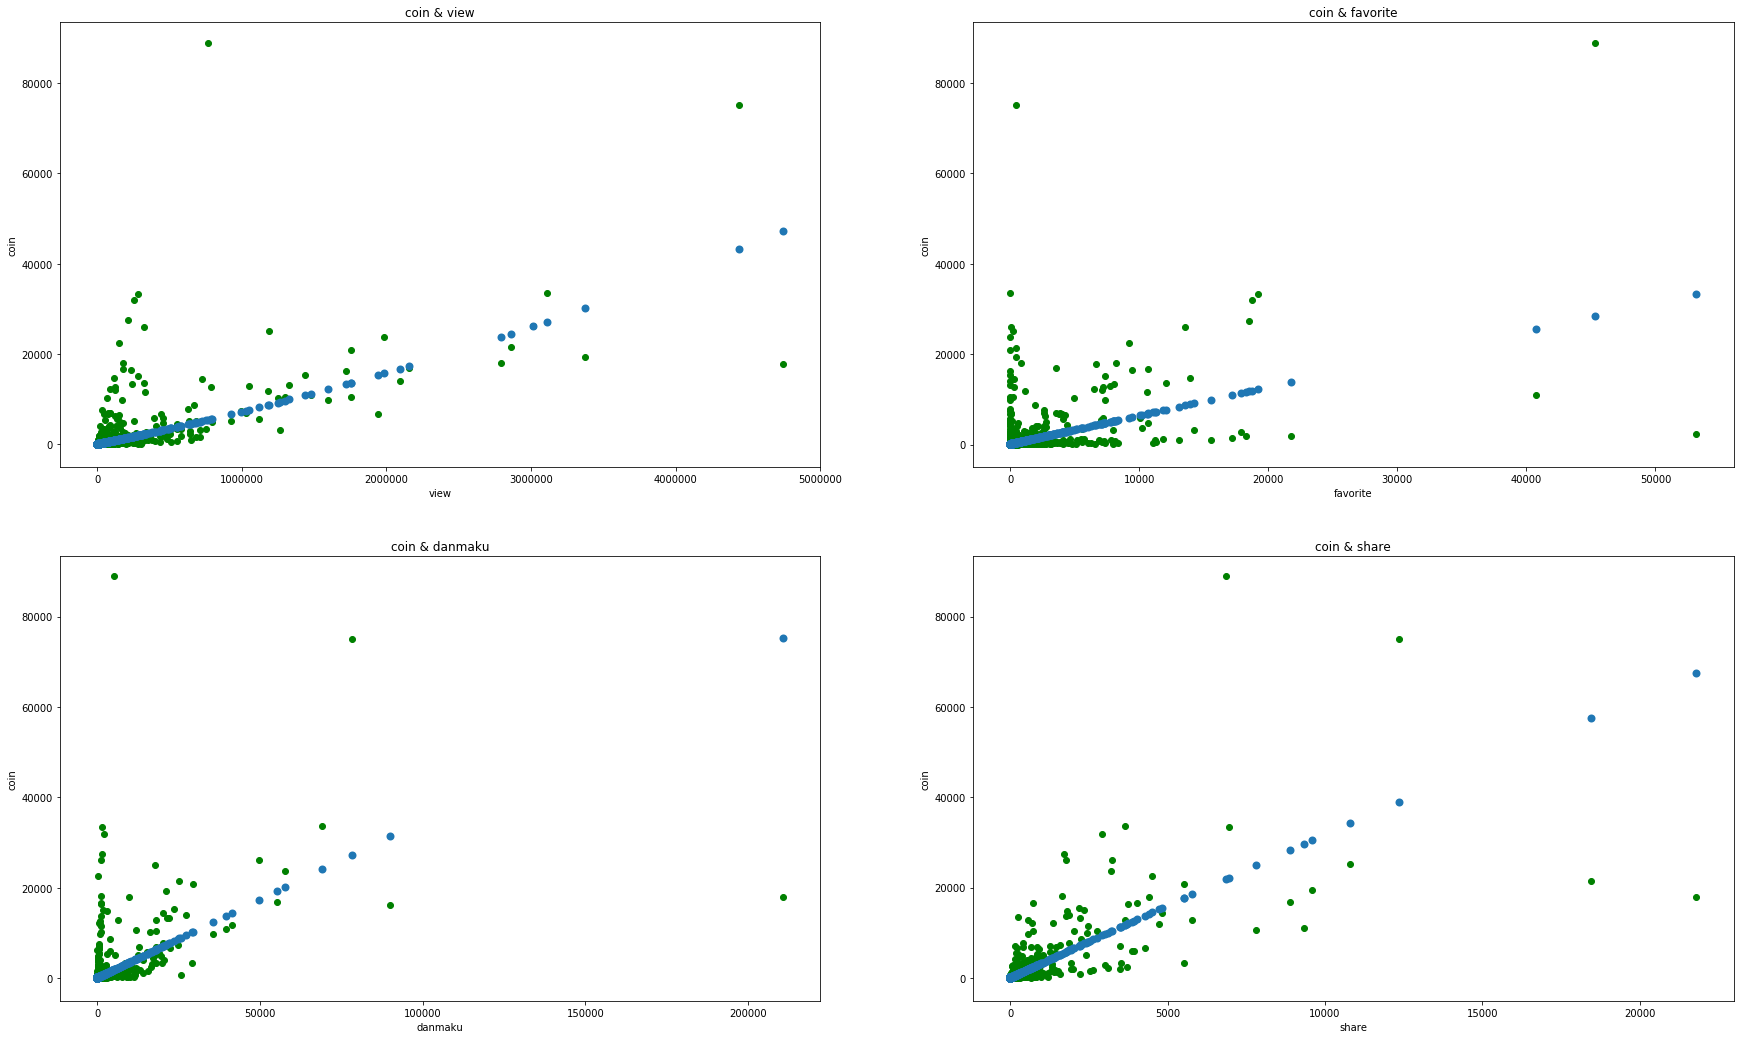

In [9]:
plt.figure(figsize=(30,18))
poli_coin('view', train, test, 1)
poli_coin('favorite', train, test, 2)
poli_coin('danmaku', train, test, 3)
poli_coin('share', train, test, 4)

### 多元回归

In [10]:
regr = linear_model.LinearRegression()
x=np.asanyarray(train[['view','favorite','danmaku', 'share']])
y=np.asanyarray(train[['coin']])
regr.fit (x, y)
# The coefficients
print('Coefficients: ', regr.coef_)
print ('Intercept: ', regr.intercept_)
y_=regr.predict(test[['view','favorite','danmaku', 'share']])
x=np.asanyarray(test[['view','favorite','danmaku', 'share']])
y=np.asanyarray(test[['coin']])
print("Residual sum of squares: %.2f" % np.mean((y_ - y) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Coefficients:  [[ 0.00618337  0.16876302 -0.11719657  1.68258826]]
Intercept:  [35.0397044]
Residual sum of squares: 2217011.95
Variance score: 0.54


### 神经网络

Using matplotlib backend: Qt5Agg
Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


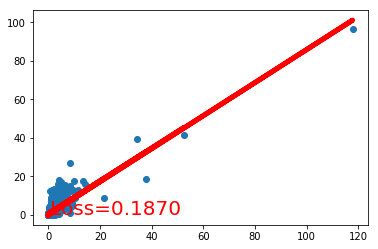

In [28]:
%matplotlib
import torch
import torch.nn.functional as F
from sklearn import preprocessing
mydf = pd.read_csv("data/data.csv").sort_values(by='share')
# msk = np.random.rand(len(mydf)) < 0.1
# train = mydf[msk]
m = list(np.array(train['share']))
n = list(np.array(train['coin']))
m = preprocessing.scale(m).astype(np.float32)
n = preprocessing.scale(n).astype(np.float32)

x = torch.unsqueeze(torch.from_numpy(m), dim=1)
y = torch.unsqueeze(torch.from_numpy(n), dim=1)


class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # 隐藏层
        self.predict = torch.nn.Linear(n_hidden, n_output)   # 输出层

    def forward(self, x):
        x = F.relu(self.hidden(x))      
        x = self.predict(x)             
        return x


net = Net(n_feature=1, n_hidden=10, n_output=1)     
print(net)

optimizer = torch.optim.Adam(net.parameters(), lr=0.01, betas=(0.9, 0.99))
loss_func = torch.nn.MSELoss() 

plt.ion()  
plt.show()

for t in range(100):
    prediction = net(x)   

    loss = loss_func(prediction, y) 

    optimizer.zero_grad() 
    loss.backward()     
    optimizer.step()

    if t % 5 == 0:
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)

plt.ioff()

## 社交网络

### PageRank

In [12]:
rank = pd.read_csv("data/rank.csv")  # 粉丝量在1000以上的up主的pagerank 
rank.sort_values(by="rank", ascending=False).head(10)

,id,name,rank,fans,articles
55,374377,泪腺战士,0.038602,106880,69
396,673816,谜之声,0.035226,50033,107
562,70093,12dora,0.012561,83424,433
688,143172,Aumi,0.011774,24759,39
1070,52363,cheeseharry,0.008793,6867,13
745,11167,平安夜的噩梦,0.008792,11018,30
340,43536,黑桐谷歌,0.008480,105868,530
521,93066,N.ec鱼丸,0.006192,29246,10
563,18232,H.K.君,0.006173,5771,18
170,2,碧诗,0.006060,26628,36


In [13]:
rank_ = pd.read_csv("data/network.csv")
rank_.sort_values(by="rank", ascending=False).head(10)

,id,name,rank,fans,articles
22,374377,泪腺战士,0.109906,106880,69
18,673816,谜之声,0.099647,50033,107
38,70093,12dora,0.047061,83424,433
58,143172,Aumi,0.044615,24759,39
63,116683,=咬人猫=,0.027800,31397,31
78,43536,黑桐谷歌,0.024804,105868,530
79,2,碧诗,0.024712,26628,36
5,11073,hanser,0.024671,31426,57
71,79,saber酱,0.018100,69767,830
85,883968,暴走漫画,0.017958,97480,54


### 关系网

88
313


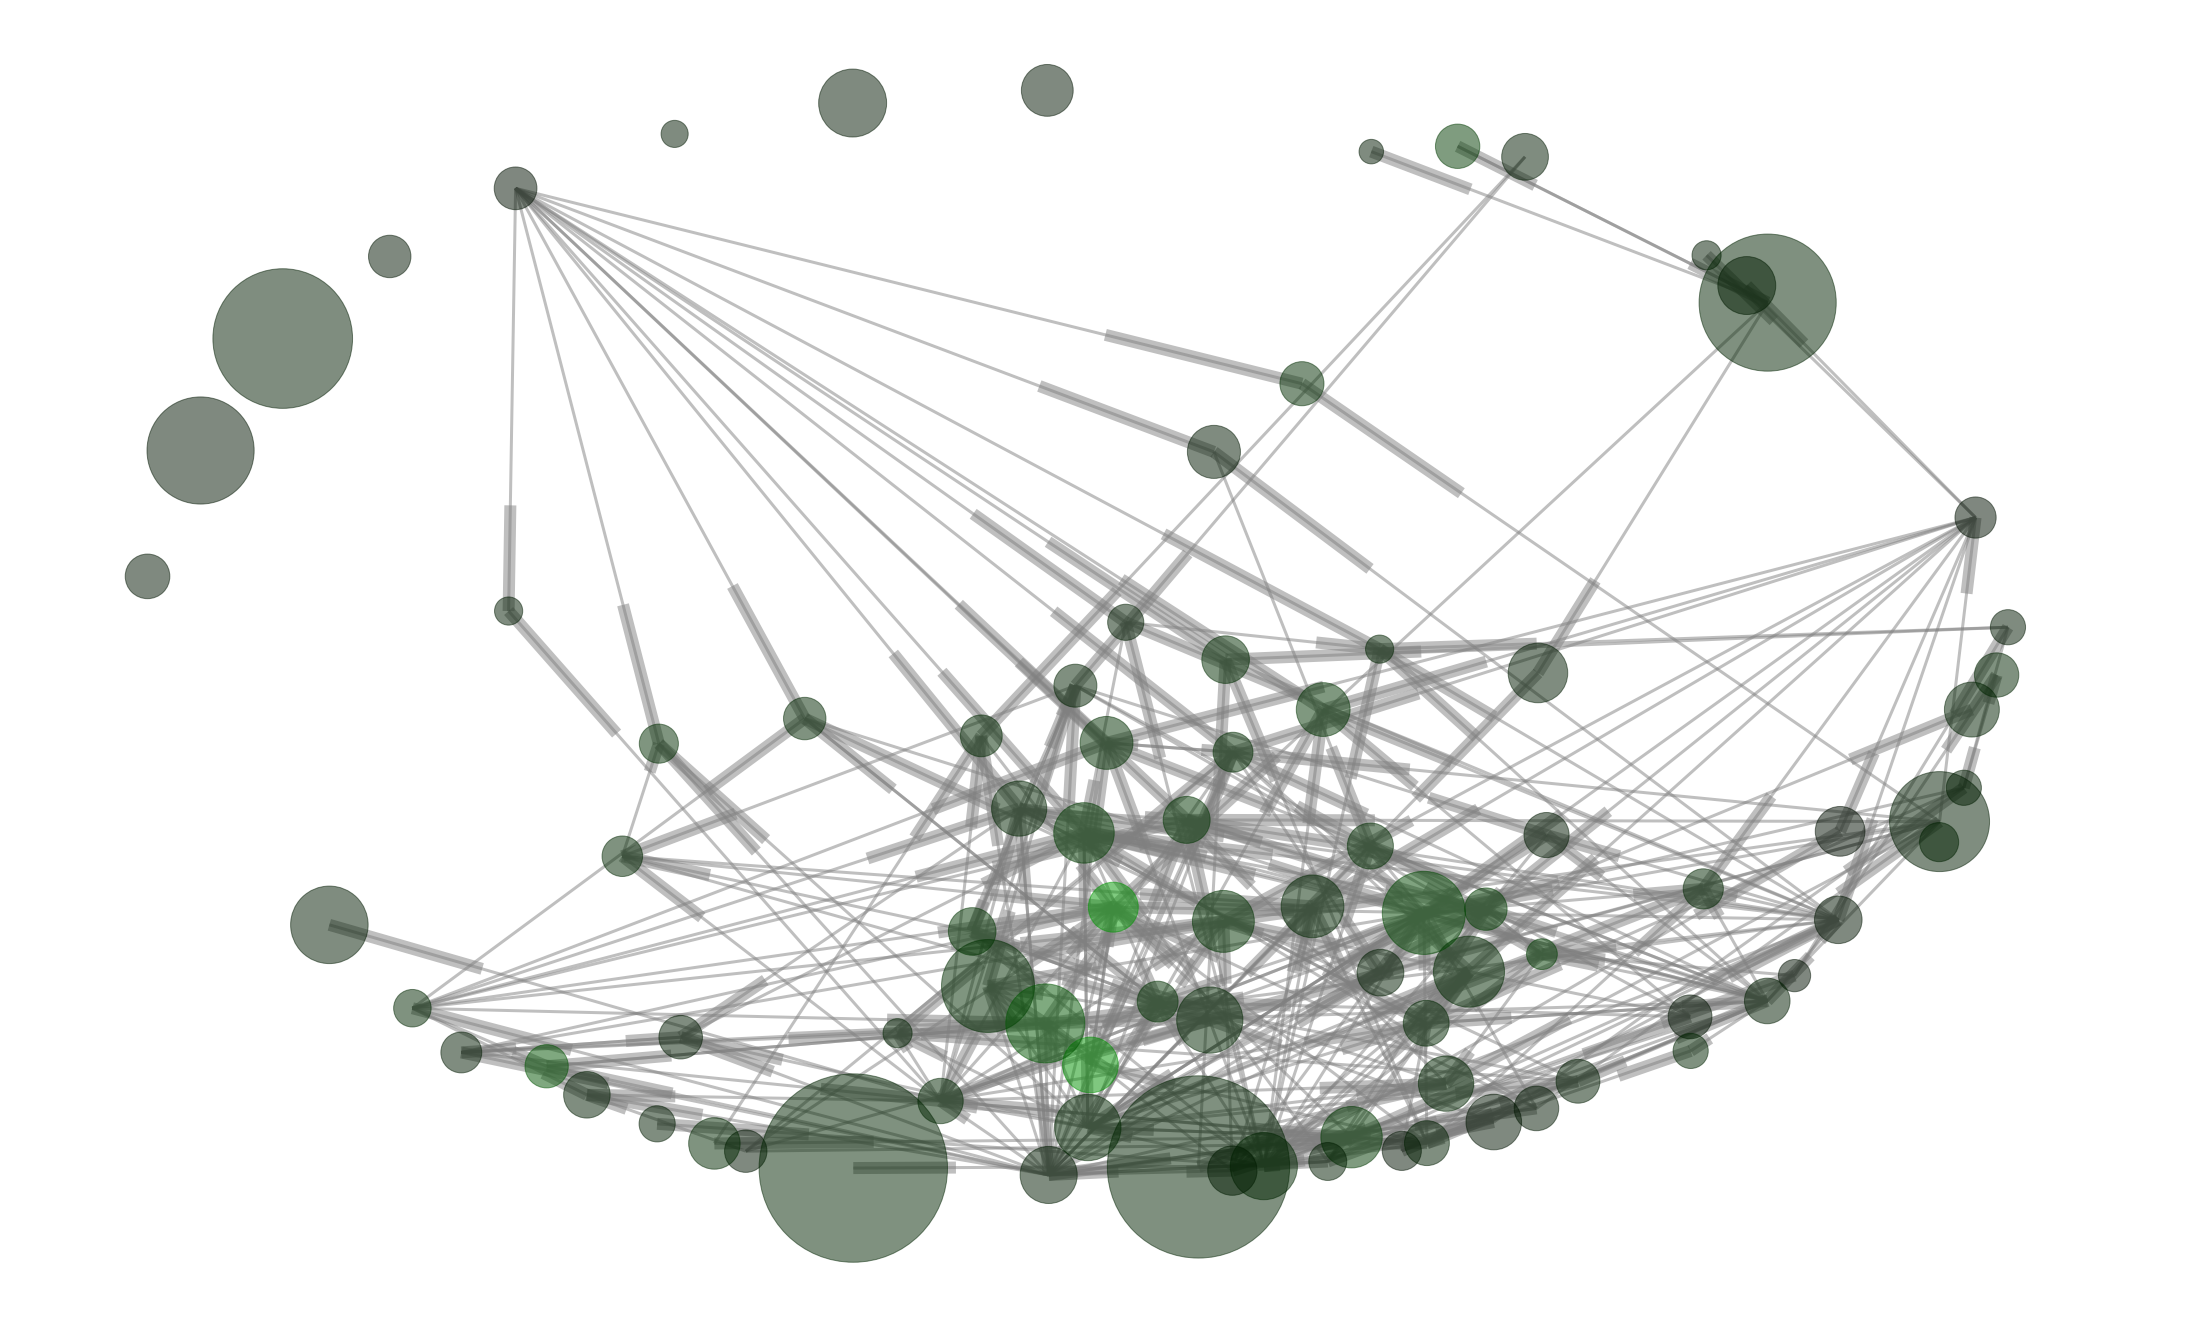

In [14]:
%matplotlib inline
import networkx as nx
import math
up_dict = {}
data_set = []
up = set()
plt.figure(figsize=(30,18))
def data_read(file_name):
    with open(file_name, encoding='utf8') as f:
        content = f.read()
        content = content.split('\n\n')
    for item in content:
        # if len(data_set) > 5000:
        #     break
        data = item.split('\n')
        tmp = data[0][3:].split(' ')
        if int(data[1][5:]) > 15000:
            if tmp[1] not in up:
                up_dict[tmp[1]] = tmp[0]
                up.add(tmp[1])
                data_tmp = [tmp[1]]
                for i in range(3, len(data)):
                    data_tmp.append(data[i][1:])
                data_set.append(data_tmp)
                
rank = pd.read_csv("data/rank.csv")
data_read("data/user.txt")
G = nx.DiGraph()
color = []
node_size = []
for item in up:
    G.add_node(item)
    tmp = list(rank[rank['id'].isin([item])]['rank'])[0]/0.109907
    art = list(rank[rank['id'].isin([item])]['articles'])[0]
    node_size.append(math.sqrt(art)*300)
    color.append([0, math.sqrt(tmp), 0])
for i in range(len(data_set)):
    for j in range(1, len(data_set[i])):
        if data_set[i][j] in up:
            G.add_edge(data_set[i][0], data_set[i][j])
print(G.number_of_nodes())
print(G.number_of_edges())
nx.draw(G, node_color=tuple(color), edge_color='grey', with_labels=False, 
        node_size=node_size, alpha=0.5, width = 3.0, arrow=True)

plt.show()

88
313


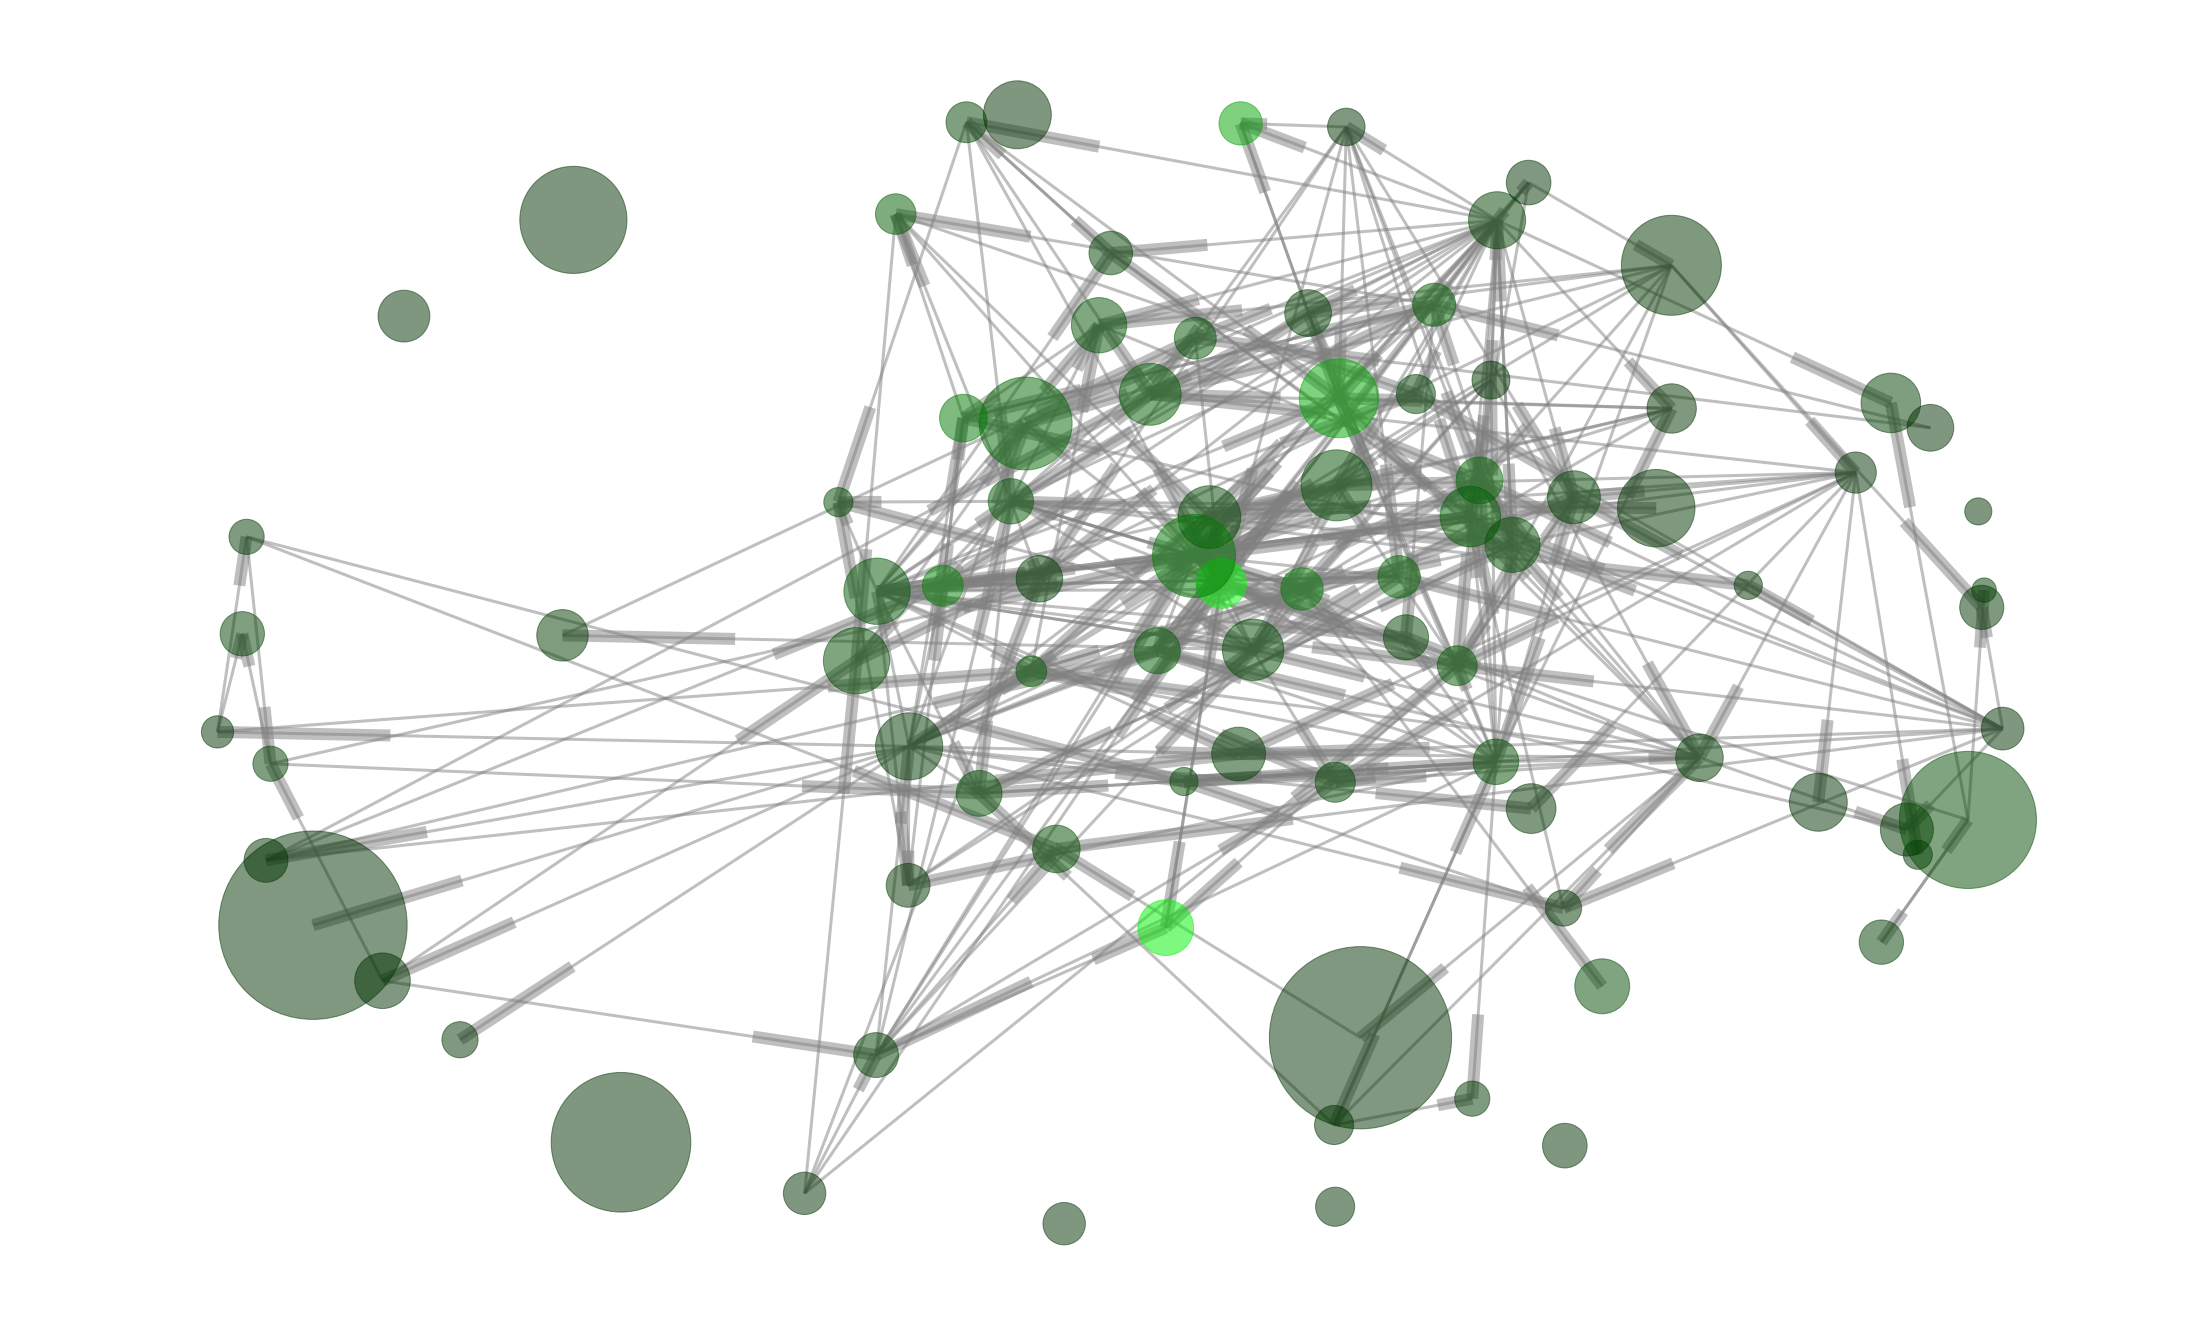

In [15]:
up_dict = {}
data_set = []
up = set()
plt.figure(figsize=(30,18))

                
rank = pd.read_csv("data/network.csv")
data_read("data/user.txt")
G = nx.DiGraph()
color = []
node_size = []
for item in up:
    G.add_node(item)
    tmp = list(rank[rank['id'].isin([item])]['rank'])[0]/0.109907
    art = list(rank[rank['id'].isin([item])]['articles'])[0]
    node_size.append(math.sqrt(art)*300)
    color.append([0, math.sqrt(tmp), 0])
for i in range(len(data_set)):
    for j in range(1, len(data_set[i])):
        if data_set[i][j] in up:
            G.add_edge(data_set[i][0], data_set[i][j])
print(G.number_of_nodes())
print(G.number_of_edges())
nx.draw(G, node_color=tuple(color), edge_color='grey', with_labels=False, 
        node_size=node_size, alpha=0.5, width = 3.0, arrow=True)

plt.show()

### 分析

#### 采用部分数据是否具有代表性

Coefficients:  [[4.23514494]]
Intercept:  [-22.27425945]


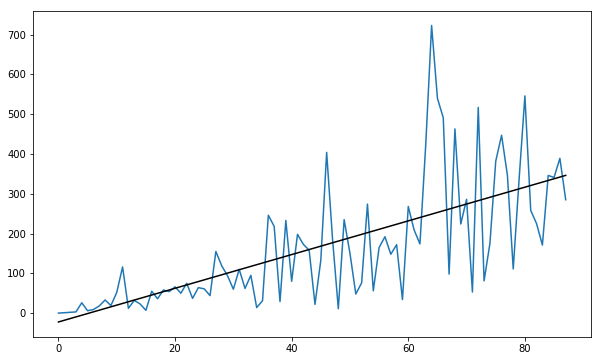

In [16]:
rank_1 = pd.read_csv('data/r.csv')
rank_2 = pd.read_csv('data/n.csv')
i_1 = np.array(rank_1['id']).tolist()
i_2 = np.array(rank_2['id']).tolist()

x = []
y = []
for i in range(len(i_2)):
    x.append([i])
    y.append([i_1.index(str(i_2[i]))])
    
x = np.array(x)
y = np.array(y)
plt.figure(figsize=(10,6))
plt.plot(x, y)
regr.fit(x, y)
y_=regr.predict(x)
plt.plot(x, y_, color='black')
print ('Coefficients: ', regr.coef_)
print ('Intercept: ', regr.intercept_)

#### 相关系数

In [17]:
import seaborn as sns

(0, 181230.33498154857)

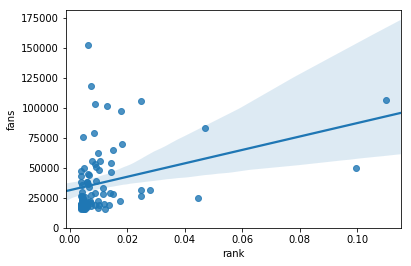

In [18]:
sns.regplot(x="rank", y="fans",data=rank)
plt.ylim(0,)

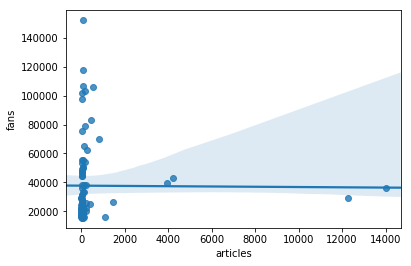

In [19]:
sns.regplot(x="articles", y="fans", data=rank)

In [20]:
rank.corr()["fans"]

id          0.031457
rank        0.331188
fans        1.000000
articles   -0.007044
Name: fans, dtype: float64

In [21]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(rank['rank'], rank['fans'])
print ("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.3311882231387909  with a P-value of P = 0.0016223778911343188


这里可以得出比较可信 0.05>pvalue>0.001

### up主能力值

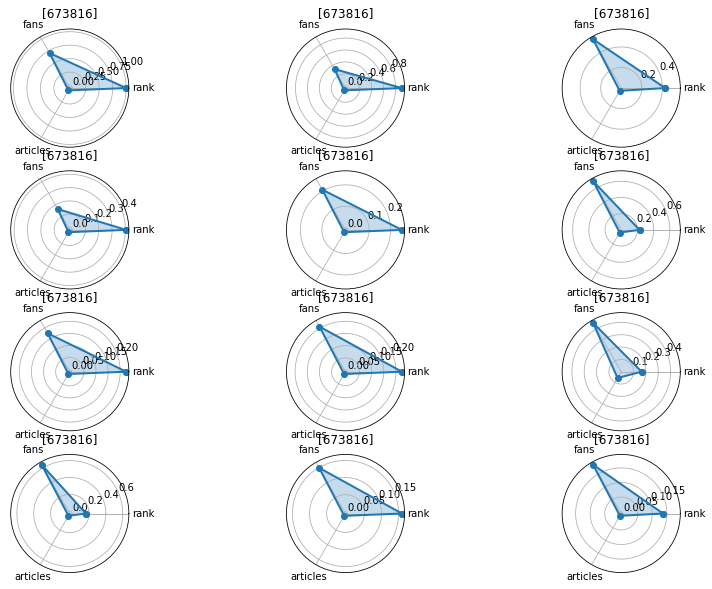

In [27]:
from pylab import rcParams
rank_ = rank_.sort_values(by="rank", ascending=False).reset_index(drop=True)
df = rank_[["rank","fans","articles"]]
df = df/df.max()
labels=np.array(["rank","fans","articles"])
fig = plt.figure()
rcParams['figure.figsize'] = (14,10)
for i in range(12):
    stats=df.loc[i,labels].values
    # Make some calculations for the plot
    angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
    stats=np.concatenate((stats,[stats[0]]))
    
    angles=np.concatenate((angles,[angles[0]]))

    # Plot stuff
    ax = fig.add_subplot(4, 3, i+1, polar=True)
    ax.plot(angles, stats, 'o-', linewidth=2)
    ax.fill(angles, stats, alpha=0.25)
    ax.set_thetagrids(angles * 180/np.pi, labels)
    ax.set_title([rank_.loc[1,"id"]])
    ax.grid(True)

plt.show()

## tag

In [23]:
import io
from scipy import misc
from pylab import rcParams

In [24]:
tag = pd.read_csv('data/tag.csv')
tag.head()

,aid,2555912,2547724,4098,1196048,40977,196632,57371,81951,8227,...,745411,466887,6873036,4775892,16344,335834,802782,4030440,229366,16383
0,37561748,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,37591091,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,37848301,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,37848477,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,37853680,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
from sklearn import tree
from sklearn.metrics import accuracy_score,confusion_matrix
y = tag.head(500)['aid']
X = tag.head(500).ix[:,1:]
bamboo_tree = tree.DecisionTreeClassifier(max_depth=100,min_samples_split=2,min_samples_leaf=2)
bamboo_tree.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=100,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [26]:
y_pred=bamboo_tree.predict(X)
accuracy_score(y, y_pred)

0.374